In [20]:
%matplotlib notebook

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sb

In [22]:
start_year = 1980

countries_and_codes_path = "../turners_health_analysis/data_exports/countries_and_codes_20Countries.csv"
countries_and_codes_data = pd.read_csv(countries_and_codes_path)
countries_and_codes_df = pd.DataFrame(countries_and_codes_data)
countries_and_codes_df

,country,country_code
0,Belgium,BEL
1,Canada,CAN
2,China,CHN
3,Denmark,DNK
4,Estonia,EST
5,Finland,FIN
6,France,FRA
7,Germany,DEU
8,Ireland,IRL
9,Israel,ISR


In [28]:
# File to Load (Remember to change these)
percent_gdp_education = "data_sources/gdp_percent_education.csv"

# Read in the data from the CSV
percent_gdp_education_data = pd.read_csv(percent_gdp_education)

# convert data to a DataFrame
percent_gdp_education_df_raw = pd.DataFrame(percent_gdp_education_data)
percent_gdp_education_df = percent_gdp_education_df_raw.rename(columns={"Country Name":"country","Country Code":"code"})
#OWID_life_expectancy_df.head()
percent_gdp_education_df.head()


,country,code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.53726,22.14366,21.74546,20.63408,21.87459,19.61272,22.85499,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.06756,16.04843,10.35680,14.10280,14.46593,12.50900,16.21170,15.66138,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.68477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.12391,NaN,11.31770,13.59696,7.52363,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.04025,9.96160,10.17952,9.66894,18.95694,NaN


In [30]:
percent_gdp_education_subset_dirty = percent_gdp_education_df.loc[(percent_gdp_education_df["code"].isin(countries_and_codes_df["country_code"])),:]


# Check to see that all the countries are in this list
countries_and_codes_df["country_code"].isin(percent_gdp_education_subset_dirty["code"].unique())
countries_and_codes_df["country"].isin(percent_gdp_education_subset_dirty["country"].unique())

#gdp_for_countries_subset["country"].unique()
#countries_and_codes_df["country"]

#percent_gdp_education_subset.head()



0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: country, dtype: bool

In [25]:
gdp_countries_subset = pd.DataFrame(columns=["gdp","year","entity","code"])

#all_countries = []

for country in percent_gdp_education_subset["country"].unique():
    spend = percent_gdp_education_subset.loc[percent_gdp_education_subset["country"] == country,"1980":"2015"].transpose()
    spend.columns = ["gdp"]
    spend["year"] = spend.index
    spend["entity"] = country
    spend["code"] = percent_gdp_education_subset.loc[percent_gdp_education_subset["country"] == country,"code"]
    gdp_countries_subset = percent_gdp_education_subset.append(spend, ignore_index=True)
    #all_countries.append(spend)
    
# new_df = pd.concat(all_countries)
# new_df.head(100)
gdp_countries_subset.tail()


gdp_countries_subset['year'] = gdp_countries_subset['year'].astype(int)
gdp_countries_subset.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


ValueError: cannot convert float NaN to integer

<IPython.core.display.Javascript object>


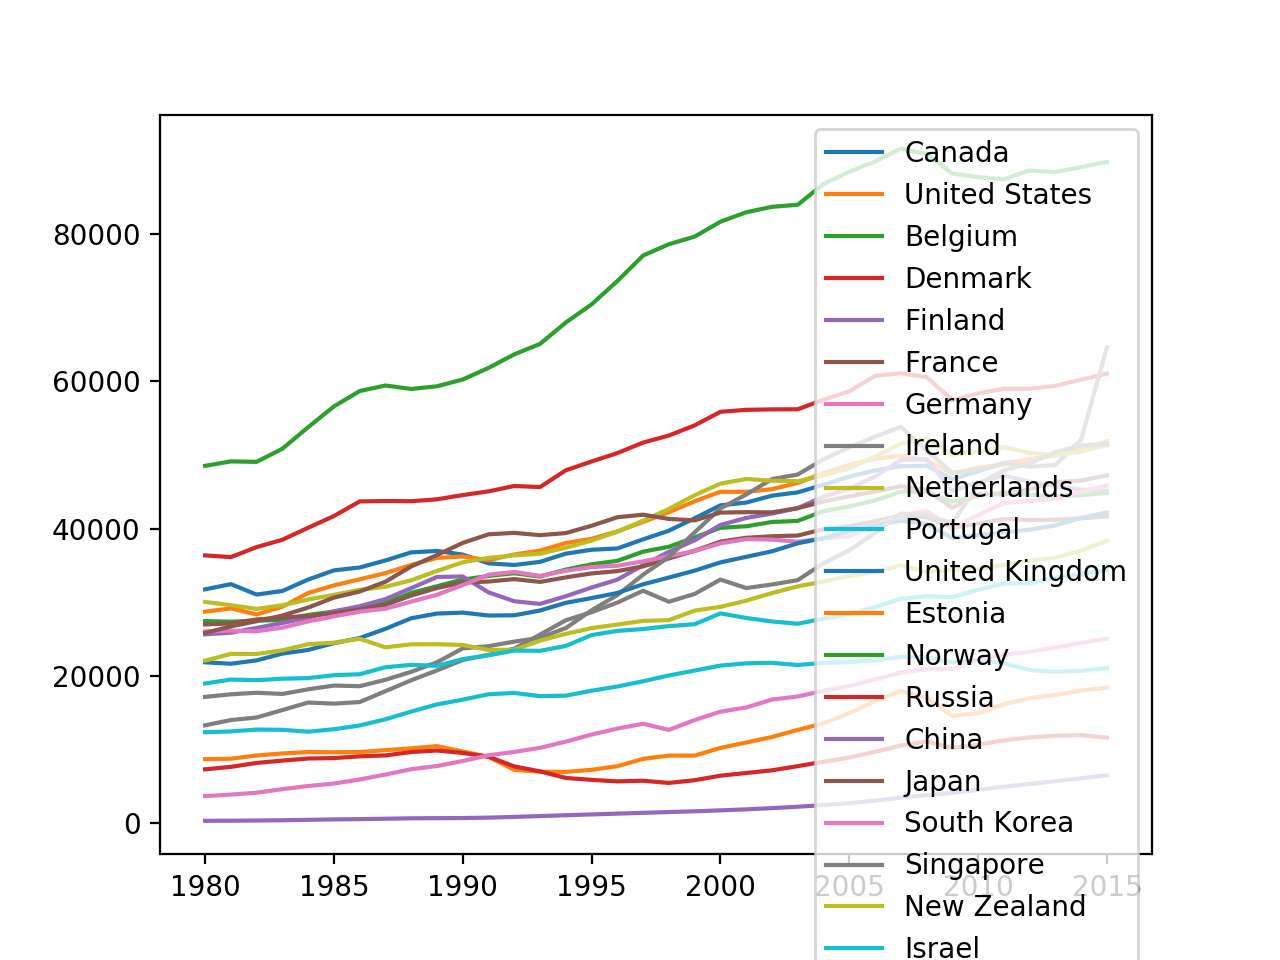

In [45]:
fig2, ax2 = plt.subplots()

for country in gdp_countries_subset["entity"].unique():
    year = gdp_countries_subset.loc[gdp_countries_subset["entity"] == country, ["year"]]
    gdp = gdp_countries_subset.loc[gdp_countries_subset["entity"] == country,["gdp"]]
    ax2.plot(year, gdp["gdp"], label=country)


#ax2.plot(x_axis_from_year_specified, world_subset_life_expectancy["Life expectancy"], label="World", linestyle='dashed', linewidth=2)

ax2.legend(loc="best")

#fig1.savefig("./Images/GDP_Total_bubblesize.png")


In [46]:
# Save path to store output file set in a variable
#csv_output = "data_exports/CLEAN_healthcare_spending_20Countries.csv"
csv_output = "data_exports/CLEAN_gdp_20Countries.csv"

# Export file as a CSV, without the Pandas index, 
# but with the header
gdp_countries_subset.to_csv(csv_output, index=False, header=True)